# Assignment Prep - Dimension Reduction

We will use [Hepatitis C Prediction dataset](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset). The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values.

Opendatasets is a python package which makes it easier to import datasets from Kaggle.

Prerequisites:

- Kaggle Account (preferrably using BU email ID)

Run the following two cells. In the second cell you will be prompted to enter username and key.

Use this link - https://www.kaggle.com/settings/account

- On the right side of your screen you can see your username.
- Scroll down a bit, you will see an API subheading. Click on '**Create new token**'.
- It should automatically download a .json file containing your username and key.
- Copy paste them into the output of the 2nd cell.

Your dataset will be visible in the folders tab on the left side of your colab screen!!

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download(
    "https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: snehaekka19
Your Kaggle Key: ··········


100%|██████████| 14.8k/14.8k [00:00<00:00, 14.9MB/s]

### This cell is for installing any python packages you want to use

In [3]:
!pip install your-package-name

# Question 1 **(3 Points)**

Normalize the features so that all the features have a mean of 0 and standard deviation = 1. Perform any other necessary pre-processing. Clearly state any assumptions you make.

**Answer 1**
---
**Loading the data**

In [44]:
df = pd.read_csv('/content/hepatitis-c-dataset/HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


**Cleaning the data**

In [45]:
# Checking the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [46]:
# Dropping the extra column
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [47]:
# Changing the datatypes
df['Category'] = df['Category'].astype('category')
df['Sex'] = df['Sex'].astype('category')

In [48]:
# Extracting the numerical and categorical columns to treat them separately
df_numeric = df.select_dtypes(include=['int64','float64'])
df_categorical = df.select_dtypes(include=['category'])

**Analyzing Categorical Attributes**

In [49]:
# Checking for unique values
unique = df_categorical.apply(lambda col: col.unique())
pd.DataFrame(unique)

,0
Category,"['0=Blood Donor', '0s=suspect Blood Donor', '1..."
Sex,"['m', 'f'] Categories (2, object): ['f', 'm']"


In [50]:
# Checking for NULLs
nan_percents = df_categorical.isna().sum()/df_categorical.shape[0]
pd.DataFrame(nan_percents, columns=['percents_of_nans']).sort_values('percents_of_nans')

,percents_of_nans
Category,0.0
Sex,0.0


The target attribute for classification is Category (2): blood donors vs. Hepatitis C patients (including its progress - Hepatitis C, Fibrosis, Cirrhosis)

In [51]:
# Combining and encoding categories
df_categorical['Category'] = df_categorical['Category'].replace({'0=Blood Donor':0, '0s=suspect Blood Donor':0,
                                                                 '1=Hepatitis':1, '2=Fibrosis':1, '3=Cirrhosis':1})
df_categorical['Sex'] = df_categorical['Sex'].replace({'m':0, 'f':1})

df_categorical.head()

,Category,Sex
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**Analyzing Numeric Attributes**

In [52]:
# Checking for NULLs
nan_percents = df_numeric.isna().sum()/df_numeric.shape[0]
pd.DataFrame(nan_percents, columns=['percents_of_nans']).sort_values('percents_of_nans')

,percents_of_nans
Age,0.000000
AST,0.000000
BIL,0.000000
CHE,0.000000
CREA,0.000000
GGT,0.000000
ALB,0.001626
ALT,0.001626
PROT,0.001626
CHOL,0.016260


Only a small % of rows have NULL values in 5 of the numeric columns. We can impute these values using the mean/median.

In [53]:
# Imputing NULL values
df_numeric_meadians = df_numeric.median()
df_numeric = df_numeric.fillna(df_numeric_meadians)
df_numeric.isna().sum()

Age     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

In [54]:
# Checking descriptive statistics for the numeric columns
df_numeric.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [55]:
# Normalizing the numeric columns (scaling them)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns = df_numeric.columns)
df_numeric_scaled

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.533616,-0.540739,-0.613566,-0.815675,-0.383693,-0.198236,-0.574734,-1.903634,0.497070,-0.502286,-0.564419
1,-1.533616,-0.540739,0.081055,-0.410629,-0.305057,-0.381375,1.349161,-0.505077,-0.146590,-0.438203,0.826054
2,-1.533616,0.914755,0.252759,0.305084,0.538767,-0.269457,0.291926,-0.148756,0.094783,-0.115957,1.345164
3,-1.533616,0.273645,-0.633077,0.084865,-0.368571,0.381706,-0.393234,-0.558525,-0.025903,-0.104971,0.677737
4,-1.533616,-0.419448,0.229345,0.163515,-0.302033,-0.091404,0.432588,-0.932661,-0.106361,-0.176378,-0.620038
...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.667014,13.594935,-0.886460,2.283879,1.963828,-1.191832,0.831124,-0.514683,11.193789,-0.657117
611,1.651437,-3.053198,1.349323,-1.004434,0.290761,0.437665,-3.020439,-2.090702,-0.367848,-0.066521,-0.138007
612,1.651437,-2.186833,0.744456,-0.980839,1.942115,1.862083,-2.965989,-1.547313,-0.293425,0.451636,1.845734
613,-0.140155,-1.493741,-0.078942,0.415194,0.823066,0.437665,-2.103866,-1.039557,-0.589106,0.191642,-0.193626


# Question 2 **(5 Points)**

We will first use Principal Component Analysis only to analyze the provided dataset without losing information. Create the appropriate PCA model and use it to Transform the data.

**Answer 2**
---

In [56]:
from sklearn.decomposition import PCA
import seaborn as sns

# Creating the model
pca = PCA()

# Fitting the model
pca.fit(df_numeric_scaled)

# Applying the model
df_numeric_transformed_1 = pca.transform(df_numeric_scaled)

df_numeric_transformed_1 = pd.DataFrame(df_numeric_transformed_1,
                                      columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
df_numeric_transformed_1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.417326,-2.138184,-0.871735,1.098761,1.170146,-0.212909,0.442108,-0.299656,0.336247,-0.193685,-0.284905
1,-1.123303,-0.212108,-0.563286,0.421233,0.811343,-0.890309,0.131675,-0.639117,0.926023,-1.131627,-0.461429
2,-1.044635,0.788776,-1.598443,0.613429,0.493299,-0.429604,0.409734,-0.085440,-0.149071,-0.493790,0.366009
3,-0.439124,-0.593569,-1.512726,0.510391,0.386766,-0.670359,-0.020516,0.194307,-0.298842,-0.026499,-0.482541
4,0.040510,-0.620659,-0.366617,0.395090,1.446913,-0.979780,0.116012,-0.204663,0.630080,-0.016476,-0.084746


# Question 3 **(5 Points)**

Find out the amount of variance captured by each principal component. Construct a scree plot to visualize this.

**Answer 3**
---

In [57]:
import plotly.express as px

fig = px.line(x=range(pca.n_components_), y=np.cumsum(pca.explained_variance_ratio_))
fig.show()

# Question 4 **(5 Points)**

Which components are required to capture at least 85% of the variance? Explain concisely through concepts and visualizations.

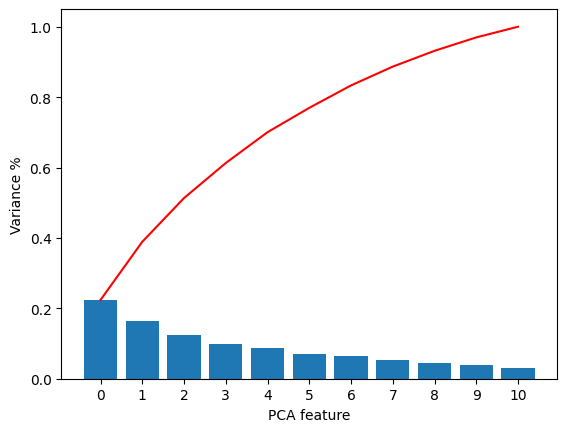

In [58]:
import matplotlib.pyplot as plt

component_ids = range(pca.n_components_)
plt.bar(component_ids, pca.explained_variance_ratio_)
plt.plot(component_ids, np.cumsum(pca.explained_variance_ratio_), color='red')
plt.xticks(component_ids)
plt.ylabel('Variance %')
plt.xlabel('PCA feature')
plt.show();

**Answer 4**
---
We need at least 8 components to capture 85% of the variance in the data. This can easily be captured in the above two plots where the cumulative percentage of variance explained reaches about 88% with 8 out of the 11 components.


# Question 5 **(5 Points)**

1. Perform K-means clustering using the original features. Explain how you decided on the optimal number of clusters.
2. Using the same number of clusters, perform clustering but using the principal components that capture 85% of the variance this time.
3. Choose an appropriate metric and measure whether using PCA has helped or hurt the clustering outcome. Explain your answer.

**Answer 5.1**
---
Performing KMeans clustering using the numeric columns

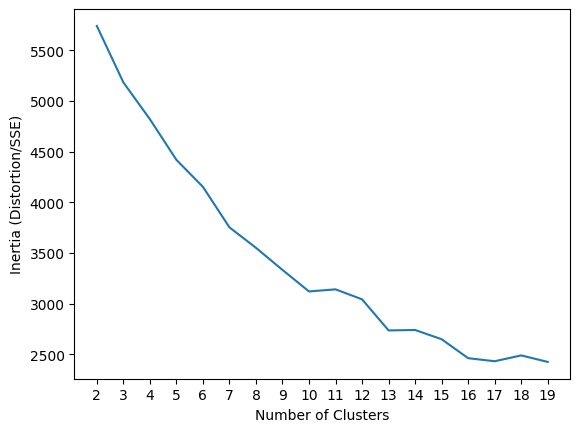

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Identifying optimal number of clusters using Elbow Plot

# A list to hold the inertia/distortion values for each k between 2-10
inertia = []

# Calculating inertia for each 'k'
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='random', n_init='auto')
    kmeans.fit(df_numeric_scaled)
    inertia.append(kmeans.inertia_)

# Visualizing the Elbow Plot
plt.plot(range(2, 20), inertia)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Distortion/SSE)")
plt.show();

- We can decide on the optimal number of clusters as 10 by visually investigating the above Elbow Plot.

In [60]:
# Performing KMeans clustering
kmeans = KMeans(n_clusters=10, init='random', n_init='auto').fit(df_numeric_scaled)

# Assigning cluster centers
df_numeric_scaled['cluster_labels'] = kmeans.labels_
df_numeric_scaled.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster_labels
0,-1.533616,-0.540739,-0.613566,-0.815675,-0.383693,-0.198236,-0.574734,-1.903634,0.497070,-0.502286,-0.564419,3
1,-1.533616,-0.540739,0.081055,-0.410629,-0.305057,-0.381375,1.349161,-0.505077,-0.146590,-0.438203,0.826054,7
2,-1.533616,0.914755,0.252759,0.305084,0.538767,-0.269457,0.291926,-0.148756,0.094783,-0.115957,1.345164,7
3,-1.533616,0.273645,-0.633077,0.084865,-0.368571,0.381706,-0.393234,-0.558525,-0.025903,-0.104971,0.677737,3
4,-1.533616,-0.419448,0.229345,0.163515,-0.302033,-0.091404,0.432588,-0.932661,-0.106361,-0.176378,-0.620038,3


**Answer 5.2**
---


In [61]:
# Performing PCA with 8 components (85% variance captured)

# Creating the model
pca_85 = PCA(n_components=8)

# Fitting the model
pca_85.fit(df_numeric_scaled)

# Applying the model
df_numeric_transformed_2 = pca_85.transform(df_numeric_scaled)

df_numeric_transformed_2 = pd.DataFrame(df_numeric_transformed_2, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
df_numeric_transformed_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.440696,-0.543534,-1.920652,-0.061400,1.443722,0.837351,-0.386006,-0.396968
1,-1.983772,-0.781809,-0.162935,-0.585919,1.139951,0.295636,-0.719869,-0.514640
2,-1.718756,-0.908345,0.968212,-1.063379,1.427090,-0.078382,-0.398625,-0.589674
3,2.205054,-1.268202,-0.264413,-0.679816,0.958857,0.045570,-0.573859,0.356530
4,2.025888,-0.480069,-0.491528,-0.120831,0.854019,1.195642,-0.993980,0.265845


In [62]:
# Performing KMeans Clustering on above components
kmeans = KMeans(n_clusters=10, init='random', n_init='auto').fit(df_numeric_transformed_2)

# Assigning cluster centers
df_numeric_transformed_2['cluster_labels'] = kmeans.labels_
df_numeric_transformed_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster_labels
0,2.440696,-0.543534,-1.920652,-0.061400,1.443722,0.837351,-0.386006,-0.396968,0
1,-1.983772,-0.781809,-0.162935,-0.585919,1.139951,0.295636,-0.719869,-0.514640,5
2,-1.718756,-0.908345,0.968212,-1.063379,1.427090,-0.078382,-0.398625,-0.589674,5
3,2.205054,-1.268202,-0.264413,-0.679816,0.958857,0.045570,-0.573859,0.356530,0
4,2.025888,-0.480069,-0.491528,-0.120831,0.854019,1.195642,-0.993980,0.265845,0


**Answer 5.3**
---

In [63]:
from sklearn.metrics import silhouette_score

normal_score = silhouette_score(df_numeric_scaled.drop('cluster_labels',axis=1), df_numeric_scaled['cluster_labels'])
pca_score = silhouette_score(df_numeric_transformed_2.drop('cluster_labels',axis=1), df_numeric_transformed_2['cluster_labels'])

print("Silhouette score of 10 clusters on original data is:", normal_score)
print("Silhouette score of 10 clusters on transformed data is:", pca_score)

Silhouette score of 10 clusters on original data is: 0.11641259069708668
Silhouette score of 10 clusters on transformed data is: 0.3070762510548515


- From the above metric (Silhouette score) we can measure the quality of clusters generated from the regular variables versus the components. We see that the clusters formed using the components has a slightly better score of 0.307 as compared to 0.11 when done with original features. This suggests that PCA seems to have helped the clustering.



# Question 6 **(7 Points)**

1. Using the PCA model with 85% of the variance, we want to reconstruct the original data using inverse PCA.

2. Find the percentage of patients that were significantly and unfavorably affected by the dimensionality reduction we performed. What do you think is a good threshold for deciding whether "the reconstruction" was poor? Justify your answer. It may be helpful to use a [cumulative histogram](https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html) to answer the question visually.

3. Find the patient that was least faithfully reconstructed. Which original attribute(s) were most unfavorably affected by the dimensionality reduction in his/her case?

**Answer 6.1**
---

In [64]:
df_numeric_transformed_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster_labels
0,2.440696,-0.543534,-1.920652,-0.061400,1.443722,0.837351,-0.386006,-0.396968,0
1,-1.983772,-0.781809,-0.162935,-0.585919,1.139951,0.295636,-0.719869,-0.514640,5
2,-1.718756,-0.908345,0.968212,-1.063379,1.427090,-0.078382,-0.398625,-0.589674,5
3,2.205054,-1.268202,-0.264413,-0.679816,0.958857,0.045570,-0.573859,0.356530,0
4,2.025888,-0.480069,-0.491528,-0.120831,0.854019,1.195642,-0.993980,0.265845,0


In [68]:
# Inverse transforming the transformed PCA data

pca_reconstructed = pca_85.inverse_transform(df_numeric_transformed_2.drop('cluster_labels', axis=1))
df_reconstructed = pd.DataFrame(pca_reconstructed, columns=df_numeric_scaled.columns[0:12])
df_reconstructed.drop('cluster_labels', axis=1, inplace=True)
df_reconstructed.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.558363,-0.281835,-0.583384,-0.755282,-0.309682,-0.274099,-0.901871,-1.741849,0.514057,-0.541402,-0.693464
1,-1.588815,0.420212,-0.009879,-0.207201,-0.264197,-0.504564,0.444313,-0.090062,-0.129800,-0.256802,0.243602
2,-1.701279,0.842023,-0.058988,0.222314,0.448419,-0.156795,0.702631,0.109639,0.065217,0.222856,0.960242
3,-1.450612,0.518436,-0.412502,0.063315,-0.169764,0.480324,-0.280215,-0.727752,-0.044303,-0.368329,0.520887
4,-1.387131,-0.083349,0.298076,0.360090,-0.454412,-0.264639,-0.378888,-1.059251,-0.075980,-0.134694,-0.342527


**Answer 6.2**
---

In [70]:
df_reconstructed_error = df_numeric_scaled.drop('cluster_labels', axis=1) - df_reconstructed

recon_error = df_reconstructed_error.abs().sum(axis=1)
df_reconstructed_error['recon_error'] = recon_error
df_reconstructed_error.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,recon_error
0,0.024747,-0.258904,-0.030182,-0.060393,-0.074011,0.075863,0.327138,-0.161785,-0.016987,0.039116,0.129045,1.198170
1,0.055199,-0.960951,0.090934,-0.203428,-0.040860,0.123189,0.904847,-0.415015,-0.016790,-0.181401,0.582452,3.575065
2,0.167663,0.072732,0.311747,0.082771,0.090347,-0.112662,-0.410705,-0.258395,0.029566,-0.338813,0.384923,2.260323
3,-0.083004,-0.244792,-0.220576,0.021550,-0.198807,-0.098618,-0.113019,0.169227,0.018400,0.263358,0.156850,1.588201
4,-0.146485,-0.336099,-0.068732,-0.196575,0.152380,0.173234,0.811476,0.126590,-0.030381,-0.041684,-0.277511,2.361147


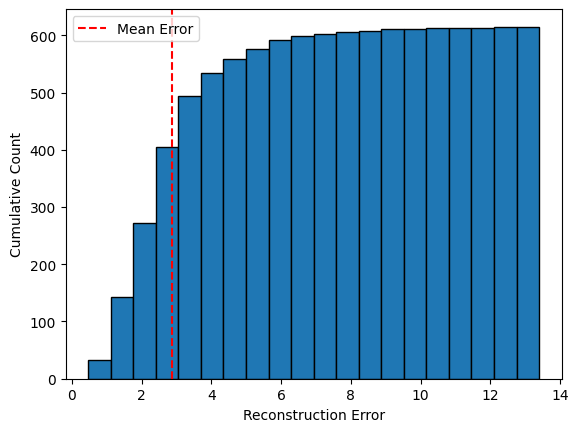

Value of threshold = 2.8813259688288535


In [72]:
plt.hist(recon_error, bins=20, cumulative=True, edgecolor='black')
plt.xlabel('Reconstruction Error')
plt.ylabel('Cumulative Count')

# Threshold of 'poor' reconstruction
mean_error = recon_error.mean()
plt.axvline(x=mean_error, color='red', linestyle='--', label='Mean Error')
plt.legend()
plt.show()

print('Value of threshold =', mean_error)

**Answer 6.3**
---

The patient that was least faithfully reconstructed

In [78]:
patient_reconstructed = df_reconstructed_error.sort_values('recon_error', ascending=False).head(1)
patient_reconstructed

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,recon_error
216,0.714392,4.883229,0.159569,0.62679,-0.001671,0.82184,-1.50901,-0.875972,-0.258874,0.609891,-2.93932,13.400559


In [79]:
patient_original = pd.DataFrame(df_numeric_scaled.iloc[216, :]).transpose()
patient_original.drop('cluster_labels', axis=1)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
216,0.457042,7.031294,0.545436,0.336544,-0.335302,-0.182974,0.319151,0.644056,-0.086246,0.883739,-0.861053


In [84]:
patient_diff = patient_original - patient_reconstructed.drop(columns=['recon_error'], axis=1)
patient_diff.drop('cluster_labels', axis=1)

,ALB,ALP,ALT,AST,Age,BIL,CHE,CHOL,CREA,GGT,PROT
216,2.148065,0.385867,-0.290246,-0.333631,-0.25735,-1.004814,1.828161,1.520028,0.172628,0.273848,2.078267


As seen above, the most unfavorably affected attributes in this case was ALB with an error of about 2.14, followed by PROT with an error of 2.07.